In [1]:
# importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#load the Ice Cream Sales Data
data=pd.read_csv("SalesData.csv")

data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [18]:
data.shape

(500, 2)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [20]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [21]:
#check for the null values and perform data cleaning

data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [22]:
#since there are no null values data cleaning is not required

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Temperature', ylabel='Density'>

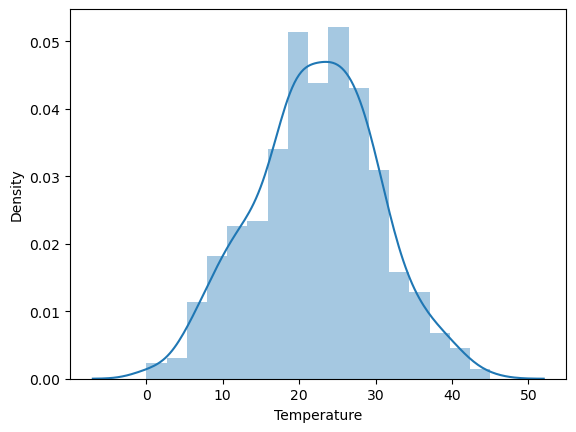

In [23]:
# Explorative Data analysis
#univariate analysis

sns.distplot(data['Temperature'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Temperature'>

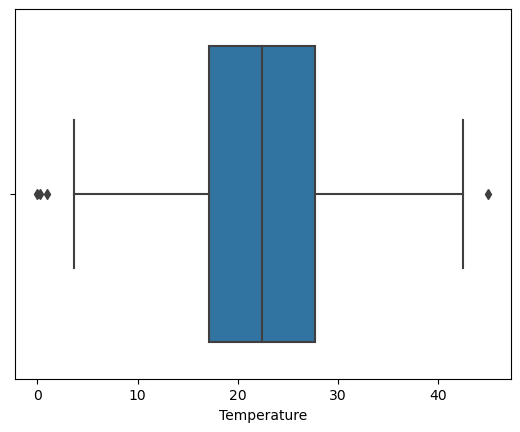

In [24]:
#for outliners:

sns.boxplot(data['Temperature'])

In [31]:
# since it is skewed we use IQR method:

# Maximum = Q3 + 1.5 * IQR
# Minimum = Q1 - 1.5 * IQR
# IQR = Q3 - Q1

In [32]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [34]:
Q1=data['Temperature'].quantile(0.25)
Q1

17.122257677500002

In [35]:
Q3=data['Temperature'].quantile(0.75)
Q3

27.7406742975

In [36]:
IQR=Q3-Q1
IQR

10.618416619999998

In [38]:
Max_boundary = Q3 + 1.5 * IQR
Min_boundary = Q1 - 1.5 * IQR
print("max boundary value:", Max_boundary)
print("min boundary value:", Min_boundary)

max boundary value: 43.6682992275
min boundary value: 1.1946327475000054


In [39]:
data[data["Temperature"] > Max_boundary]

,Temperature,Revenue
444,45.0,1000.0


In [40]:
data[data["Temperature"] < Min_boundary]

,Temperature,Revenue
8,0.976870,55.390338
371,0.267028,32.546619
402,0.000000,10.000000


In [41]:
#capping

def cap_placement(x):
    if x > Max_boundary:
        x = Max_boundary
    elif x < Min_boundary:
        x = Min_boundary
    else:
        x=x
    return x

In [43]:
data['Temperature']=data['Temperature'].apply(cap_placement)

<Axes: xlabel='Temperature'>

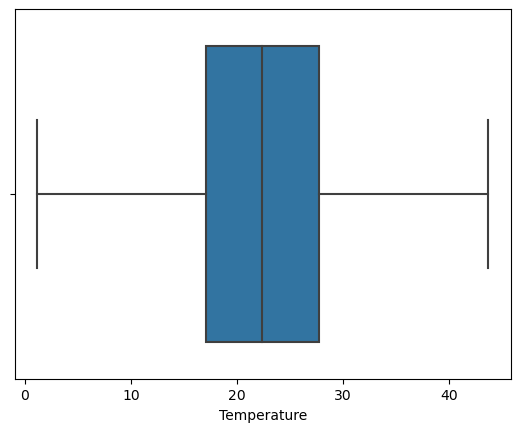

In [44]:
sns.boxplot(x=data['Temperature'])

<Axes: xlabel='Temperature', ylabel='Revenue'>

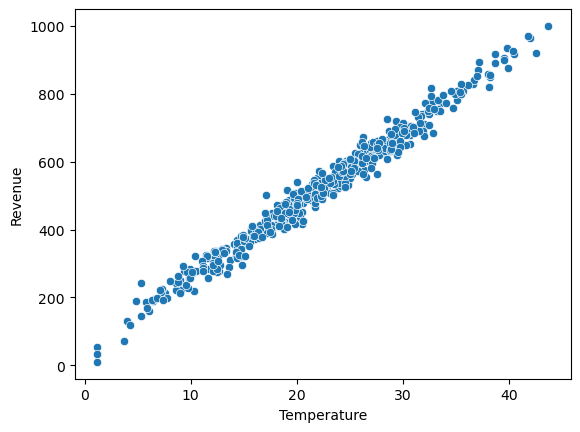

In [45]:
#Bivariate analysis

sns.scatterplot(data=data,x='Temperature',y='Revenue')

In [46]:
data.select_dtypes("object").head()

""
0
1
2
3
4


In [47]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [48]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [49]:
x.head(2)

,Temperature
0,24.566884
1,26.005191


In [50]:
y.head(2)

0    534.799028
1    625.190122
Name: Revenue, dtype: float64

In [51]:
#split the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 1), (100, 1), (400,), (100,))

In [53]:
#Build the model 
#Linear Regression
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=model.predict(x_test)

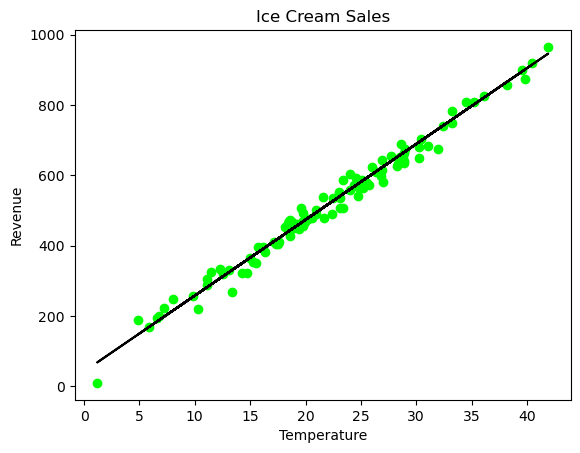

In [59]:
plt.scatter(x_test,y_test,c='lime')
plt.plot(x_test,y_pred,c='k')
plt.title("Ice Cream Sales")
plt.ylabel("Revenue")
plt.xlabel("Temperature")
plt.show()

In [60]:
#predict new data
new=[4,6]
new=np.array(new).reshape(-1,1)
new

array([[4],
       [6]])

In [61]:
model.predict(new)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128.98809439, 172.10358934])

In [63]:
#to check the accuracy of the model

model.score(x_test,y_test)*100

98.29405318669815